This notebook shows how the toy example can be implemented in the SHAP Library.

> Notice however that there is no sense to apply SHAP values in the toy model. This is just for didactic purposes.

In [4]:
#pip install shap

Note: you may need to restart the kernel to use updated packages.


100%|██████████| 1/1 [00:00<00:00, 55.79it/s]

SHAP values for input [1, 1]: [[1.5 2.5]]
Sum of SHAP values + baseline: 8.0


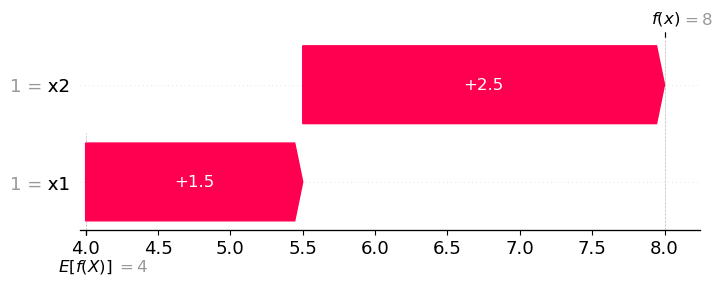

In [5]:
import shap
import numpy as np
import pandas as pd

# 1. Define the model
def model(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    return 3 * x1 + 5 * x2

# 2. Define background dataset (4 possible combinations)
background = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 3. Define input to explain
x_to_explain = np.array([[1, 1]])

# 4. Create SHAP KernelExplainer
explainer = shap.KernelExplainer(model, background)

# 5. Compute SHAP values
shap_values = explainer.shap_values(x_to_explain)

# 6. Print results
print("SHAP values for input [1, 1]:", shap_values)
print("Sum of SHAP values + baseline:", np.sum(shap_values) + explainer.expected_value)

# Optional: plot waterfall
shap.plots.waterfall(shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=x_to_explain[0],
    feature_names=["x1", "x2"]
))
